# Census Income

Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

Dataset Link-

https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv


# Data Pre-processing

Data Pre-processing refers to Data Integration, Data Analysis, Data cleaning, Data Transformation, and Dimension Reduction

Data preprocessing is the process of cleaning and preparing the raw data to enable feature engineering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
census_df=pd.read_csv("census_income.csv")

In [3]:
census_df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
#showing bottom 5 rows
census_df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
census_df.shape

(32560, 15)

In the above datasets there are 32560 rows and 15 columns are present in the datasets

In [6]:
#columns details
census_df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [7]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


The information will give Index, dataTypes and memory information

From the above datasets there is no null values becuse all the index values have the same values in 15 columns and 32560 rows, in that datasets there are 6 int colunm, 9 is object columns

In [8]:
#checking the null values
census_df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In the above data sets there is no null value

<AxesSubplot:>

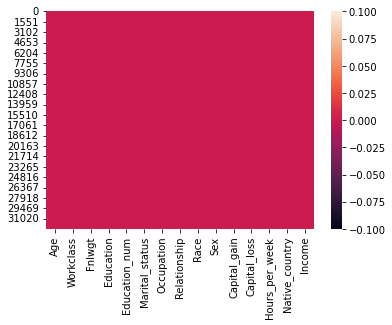

In [9]:
#lets visualize it using heatmap for null values
sns.heatmap(census_df.isnull())

In [10]:
census_df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

uunique() based on several unique values in each columns and data description, we can indentify the continuous and categorical coluns in the data.

# EDA Exploratory Data Analysis

Exploratory Data Analysis refers to the crucial process of performing initial investigations on data to discover patterns to check assumptions with the help of summary statistics and graphical representations.

EDA can be leveraged to check for outliers, patterns, and trends in the given data.

EDA helps to find meaningful patterns in data.

EDA provides in-depth insights into the data sets to solve our business problems.

EDA gives a clue to impute missing values in the dataset

Statistics Summary

The information gives a quick and simple description of the data.

Can include Count, Mean, Standard Deviation, median, mode, minimum value, maximum value, range, standard deviation, etc.

Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

In [11]:
census_df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


The Count shows there is no null values beacuse all the columns are same values

#Stad Deviation #min - miniumum value of all the values #25% -Quartile -1st quartile

#50% -Quartile- and its also say median -2nd quartile

#75% -Quaratile -3rd quartile

#Max - are largest value

#Mean is less than the median it means your data is left escape 

#mean is greater than median then it means your data is right escaped

Education number, capital gain, capital loss,  - Mean is more than the median value it means data shows as left escape

Age, fnglwt, hr per weak- Mean is less than the median value it means that data shoes the right escaped

age,Educational num, capital gain , capital loss, Hr per weak,- colums Max values are more than the 3rd quartile(75% percentile ) it shows the outliers are present in the columns

Before we do EDA, lets separate Numerical and categorical variables for easy analysis- in case nay numerical and categorical values are there

In [12]:
#Separting Numerical and categorical column

categorical_col = []
for i in census_df.dtypes.index:
    if census_df.dtypes[i] == "object":     #dtypes[i]-dtypes of any columns object it will append that columns in empty list 
        categorical_col.append(i)    #append method is used to add the value in your existing list
print("Categorical Columns:", categorical_col)
print("\n")

#Checking for Numerical columns
#Explanatory mark is used for not- when the condition my datatype is not object in that time  
#cont--is not satisifed in that time it append the numerical list
numerical_col = []        #creating empty list
for i in census_df.dtypes.index:
    if census_df.dtypes[i]!='object':      
        numerical_col.append(i)
print("Numerical Columns:", numerical_col)

Categorical Columns: ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


Numerical Columns: ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


# Data Visualization

EDA Univariate Analysis

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


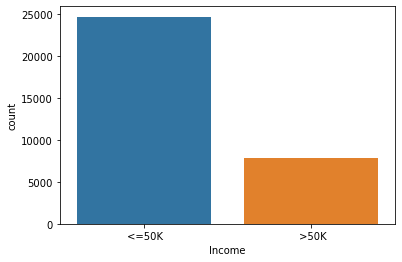

In [13]:
ax = sns.countplot(x='Income',data=census_df)
print(census_df['Income'].value_counts())

In the above graph shows <=50k Anual income persons and also >50k persons are less

 Male      21789
 Female    10771
Name: Sex, dtype: int64


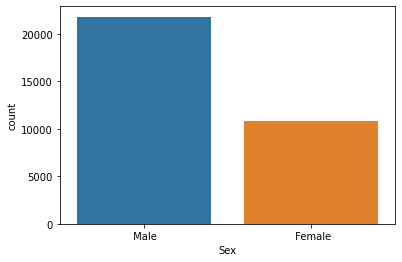

In [14]:
print(census_df['Sex'].value_counts())
ax = sns.countplot(x='Sex',data=census_df)
plt.show()

from the plot we can observe that the total number of males high compared to the females

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


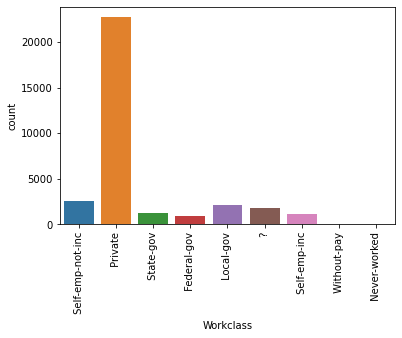

In [15]:
print(census_df['Workclass'].value_counts())
ax = sns.countplot(x='Workclass',data=census_df)
plt.xticks(rotation=90)
plt.show()

from the above graph shows private employees are more compared to the remaing work class

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


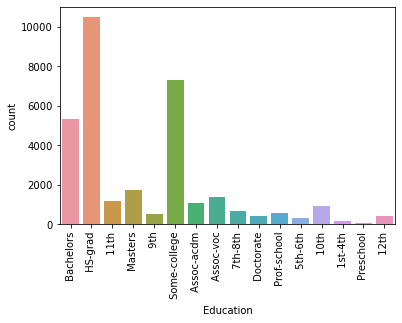

In [16]:
print(census_df['Education'].value_counts())
ax = sns.countplot(x='Education',data=census_df)
plt.xticks(rotation=90)
plt.show()

we can observe that the HS -Grad education people arte more compared to the all other educations

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


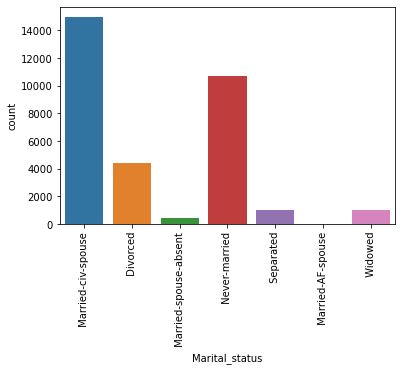

In [17]:
print(census_df['Marital_status'].value_counts())
ax = sns.countplot(x='Marital_status',data=census_df)
plt.xticks(rotation=90)
plt.show()

we can observe that Married-civ-spouse 14976, Never-married- 10682, are high compared to the other satus

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


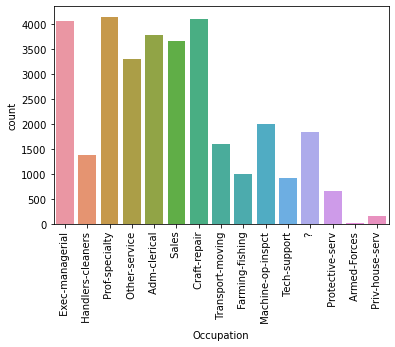

In [18]:
print(census_df['Occupation'].value_counts())
ax = sns.countplot(x='Occupation',data=census_df)
plt.xticks(rotation=90)
plt.show()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


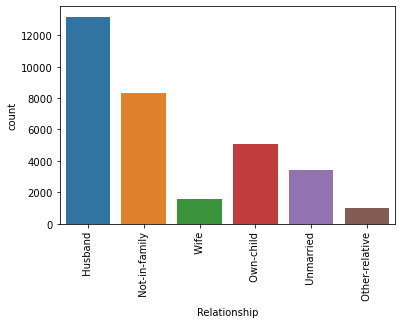

In [19]:
print(census_df['Relationship'].value_counts())
ax = sns.countplot(x='Relationship',data=census_df)
plt.xticks(rotation=90)
plt.show()

we can observe that Husband are high numbers compared to all the relations

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


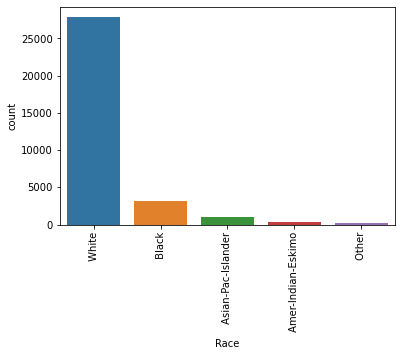

In [20]:
print(census_df['Race'].value_counts())
ax = sns.countplot(x='Race',data=census_df)
plt.xticks(rotation=90)
plt.show()

we can observe taht white peoples are more compared to the other peoples

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

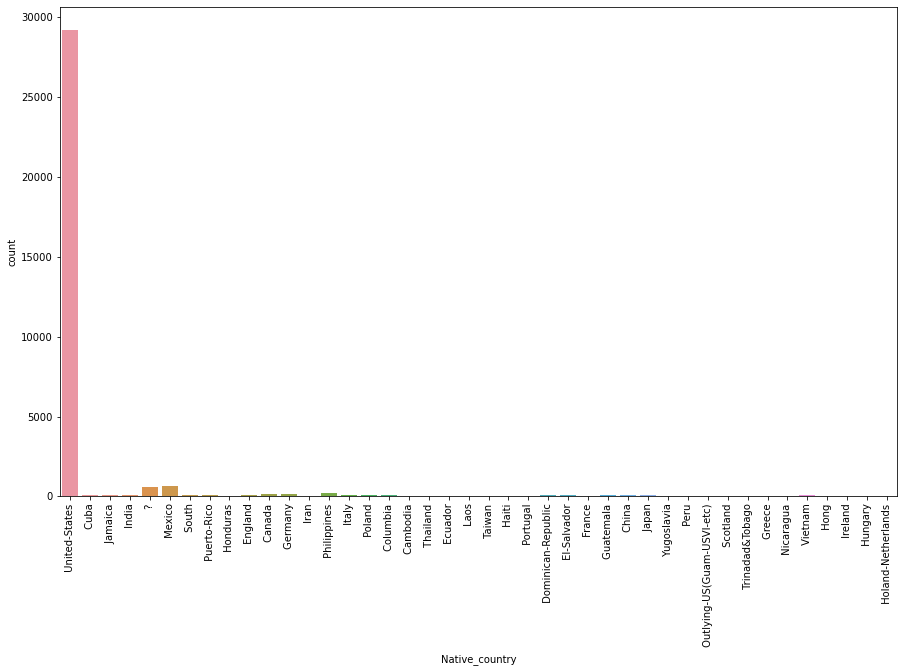

In [21]:
plt.figure(figsize=(15, 9))
print(census_df['Native_country'].value_counts())
ax = sns.countplot(x='Native_country',data=census_df)
plt.xticks(rotation=90)
plt.show()

we can observe that united-States peoples are high compared to all other country

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

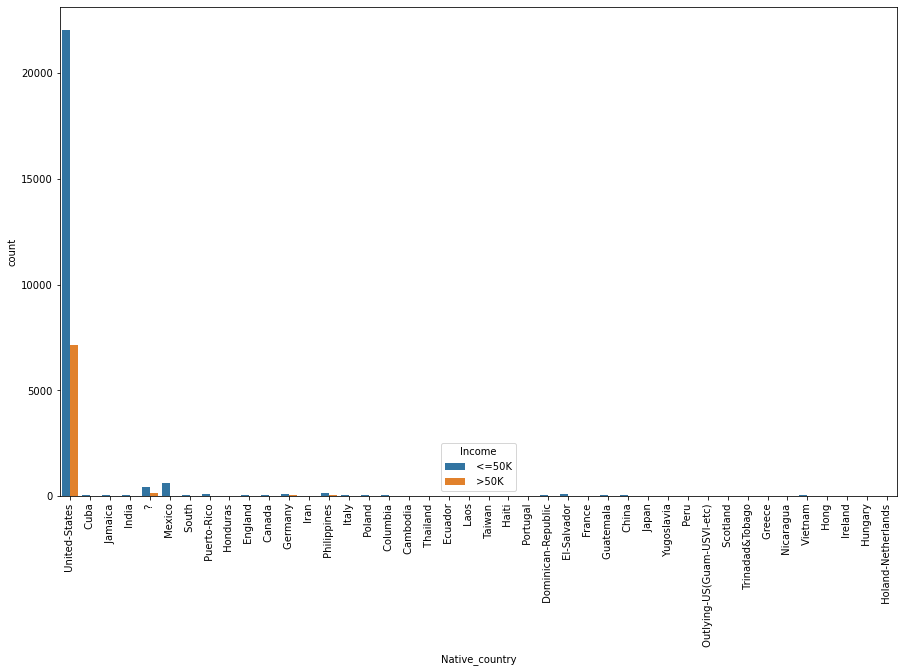

In [22]:
plt.figure(figsize=(15, 9))
print(census_df['Native_country'].value_counts())
ax = sns.countplot(x='Native_country',data=census_df, hue='Income')
plt.xticks(rotation=90)
plt.show()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


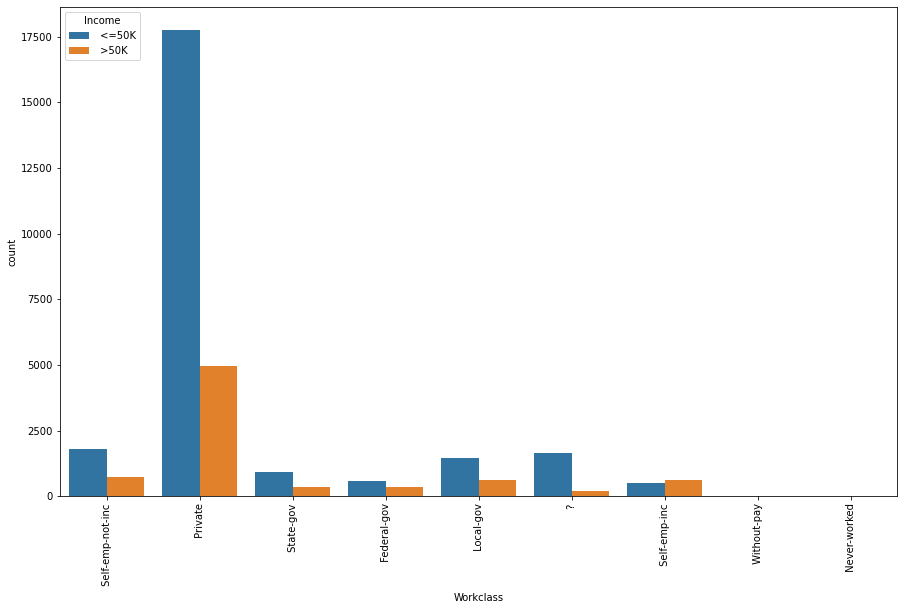

In [23]:
plt.figure(figsize=(15, 9))
print(census_df['Workclass'].value_counts())
ax = sns.countplot(x='Workclass',data=census_df, hue='Income')
plt.xticks(rotation=90)
plt.show()

we can observe that private employee are earns more than >50k and also less than 50k

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


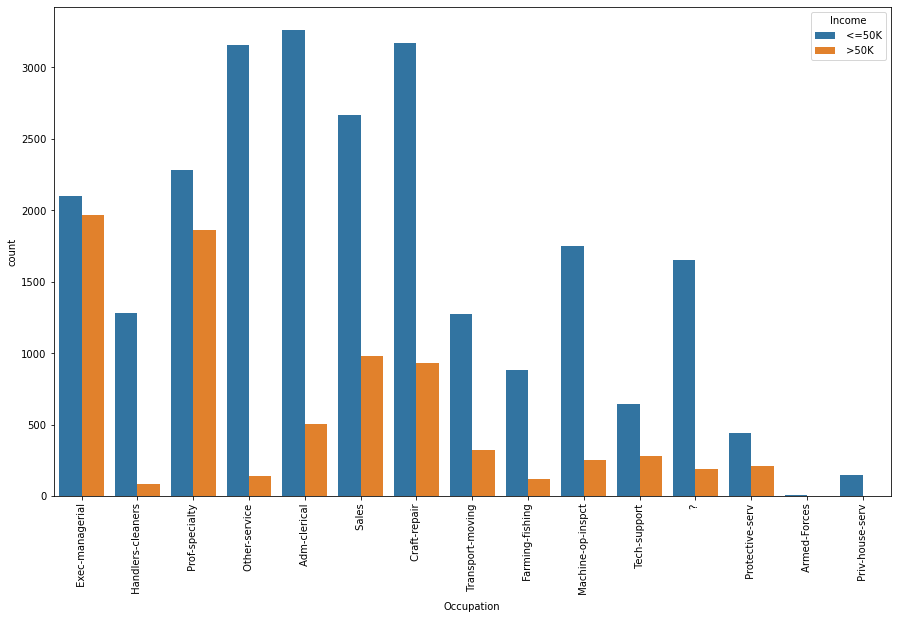

In [24]:
plt.figure(figsize=(15, 9))
print(census_df['Occupation'].value_counts())
ax = sns.countplot(x='Occupation',data=census_df, hue='Income')
plt.xticks(rotation=90)
plt.show()

# Bivariate Analysis

Bivariate analysis done between two columns

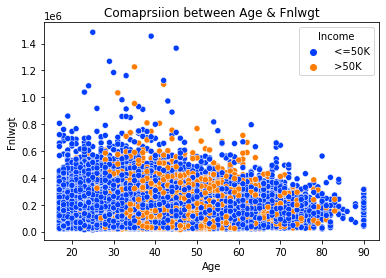

In [25]:
plt.title("Comaprsiion between Age & Fnlwgt")
sns.scatterplot(x = 'Age', y = 'Fnlwgt', data = census_df, hue = 'Income', palette ='bright')
plt.show()

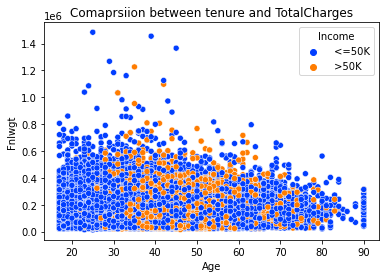

In [26]:
plt.title("Comaprsiion between tenure and TotalCharges")
sns.scatterplot(x = 'Age', y = 'Fnlwgt', data = census_df, hue = 'Income', palette ='bright')
plt.show()

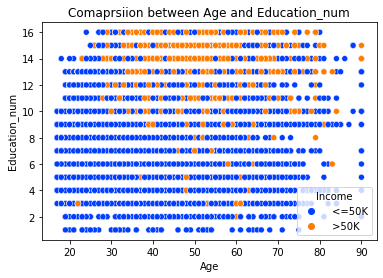

In [27]:
plt.title("Comaprsiion between Age and Education_num")
sns.scatterplot(x = 'Age', y = 'Education_num', data = census_df, hue = 'Income', palette ='bright')
plt.show()

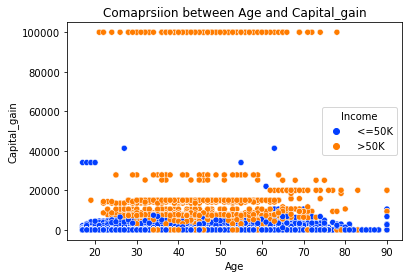

In [28]:
plt.title("Comaprsiion between Age and Capital_gain")
sns.scatterplot(x = 'Age', y = 'Capital_gain', data = census_df, hue = 'Income', palette ='bright')
plt.show()

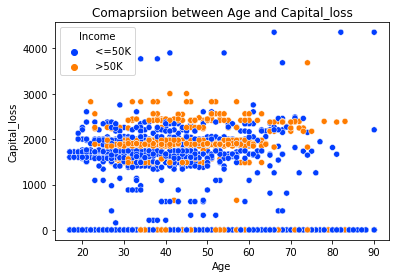

In [29]:
plt.title("Comaprsiion between Age and Capital_loss")
sns.scatterplot(x = 'Age', y = 'Capital_loss', data = census_df, hue = 'Income', palette ='bright')
plt.show()

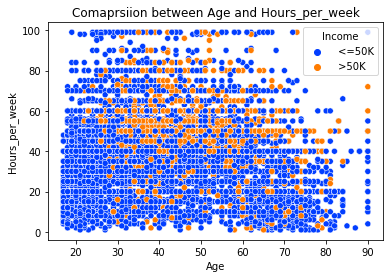

In [30]:
plt.title("Comaprsiion between Age and Hours_per_week")
sns.scatterplot(x = 'Age', y = 'Hours_per_week', data = census_df, hue = 'Income', palette ='bright')
plt.show()

<Figure size 5400x3600 with 0 Axes>

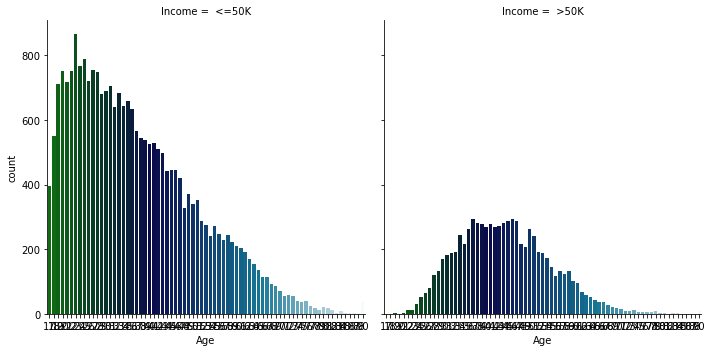

In [31]:
plt.figure(figsize=(75,50))
sns.catplot(x='Age', col= 'Income', palette= "ocean", kind = "count", data = census_df)
plt.show()

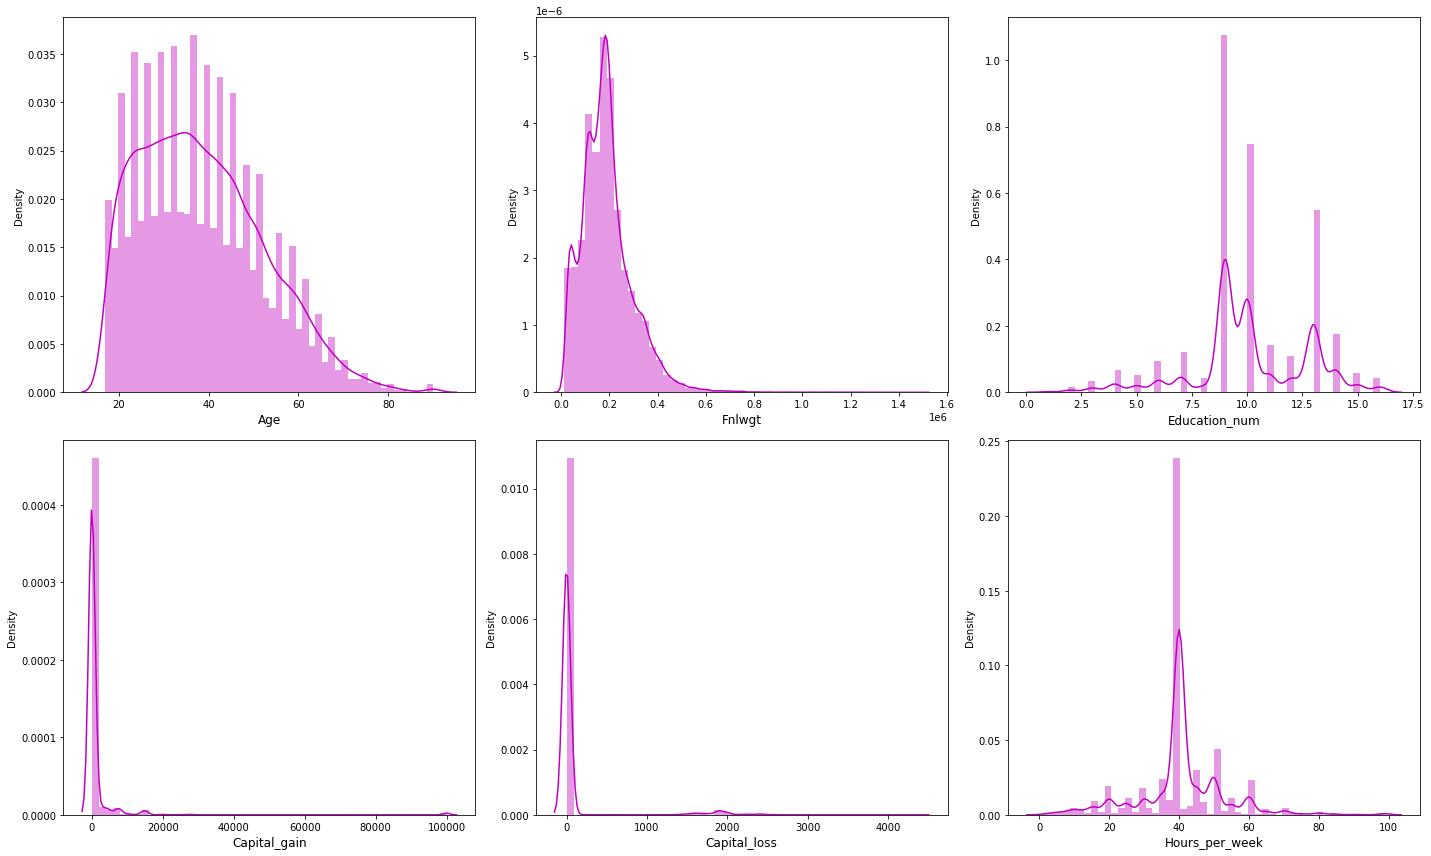

In [32]:
#Distplot
plt.figure(figsize = (20, 12), facecolor = "white")
plotnumber = 1
for col in numerical_col:   # for col using numerical_col
    if plotnumber<=17:       #pltnumber is less than four equal to 4 each grap we are using four plot
        ax = plt.subplot(2,3 , plotnumber) #number of plot in given dimenstion using subplot 
        sns.distplot(census_df[col], color = "m") #plt colour for columns
        plt.xlabel(col, fontsize = 12)
        plt.yticks(rotation = 0, fontsize =10)
    plotnumber+=1
plt.tight_layout()

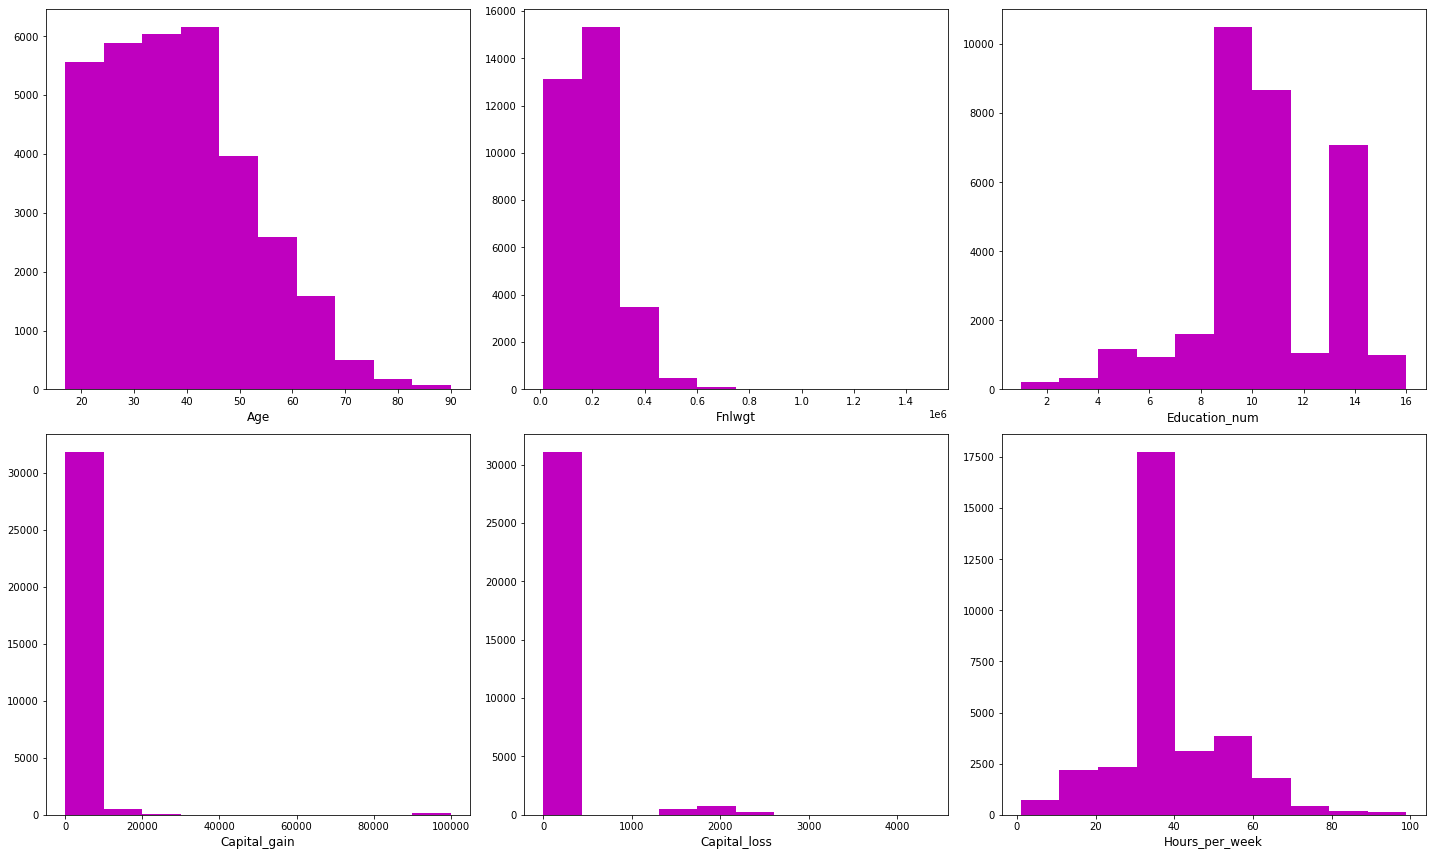

In [33]:

plt.figure(figsize = (20, 12), facecolor = "white")
plotnumber = 1
for col in numerical_col:   # for col using numerical_col
    if plotnumber<=17:       #pltnumber is less than four equal to 4 each grap we are using four plot
        ax = plt.subplot(2, 3, plotnumber) #number of plot in given dimenstion using subplot 
        plt.hist(census_df[col], color = "m") #plt colour for columns
        plt.xlabel(col, fontsize = 12)
        plt.yticks(rotation = 0, fontsize =10)
    plotnumber+=1
plt.tight_layout()

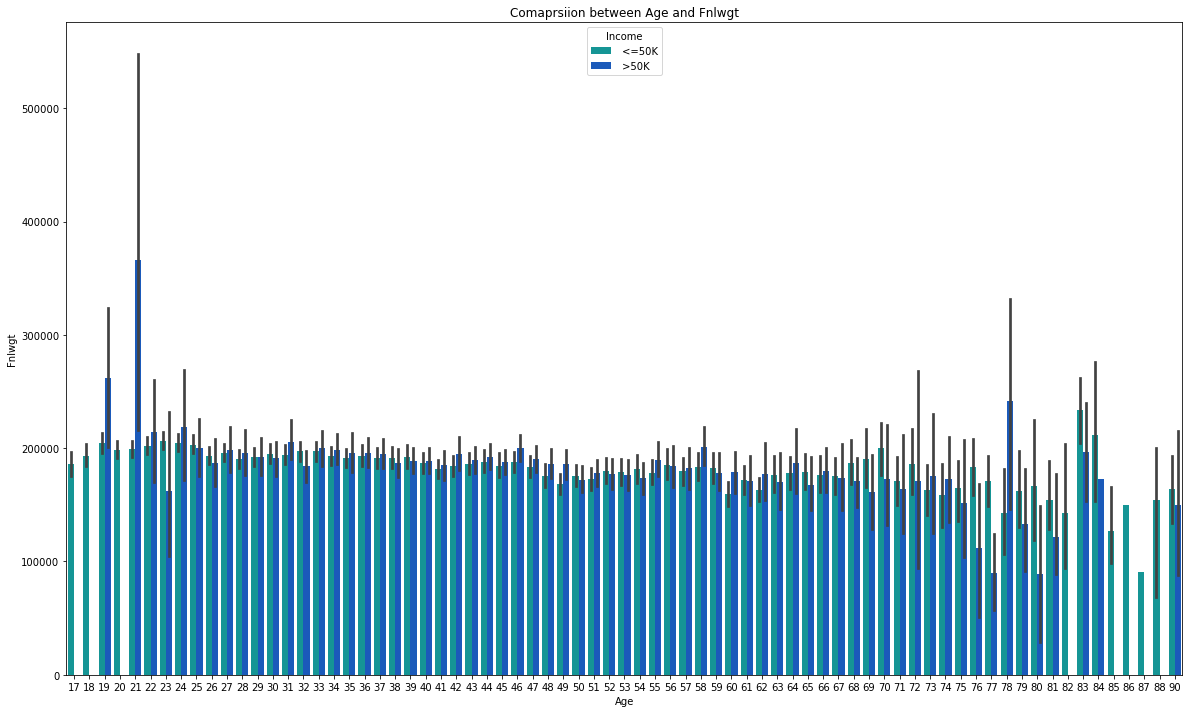

In [34]:
plt.figure(figsize = (20, 12))
plt.title("Comaprsiion between Age and Fnlwgt")
sns.barplot(x = 'Age', y = 'Fnlwgt', data = census_df, hue = 'Income', palette ='winter_r')
plt.show()

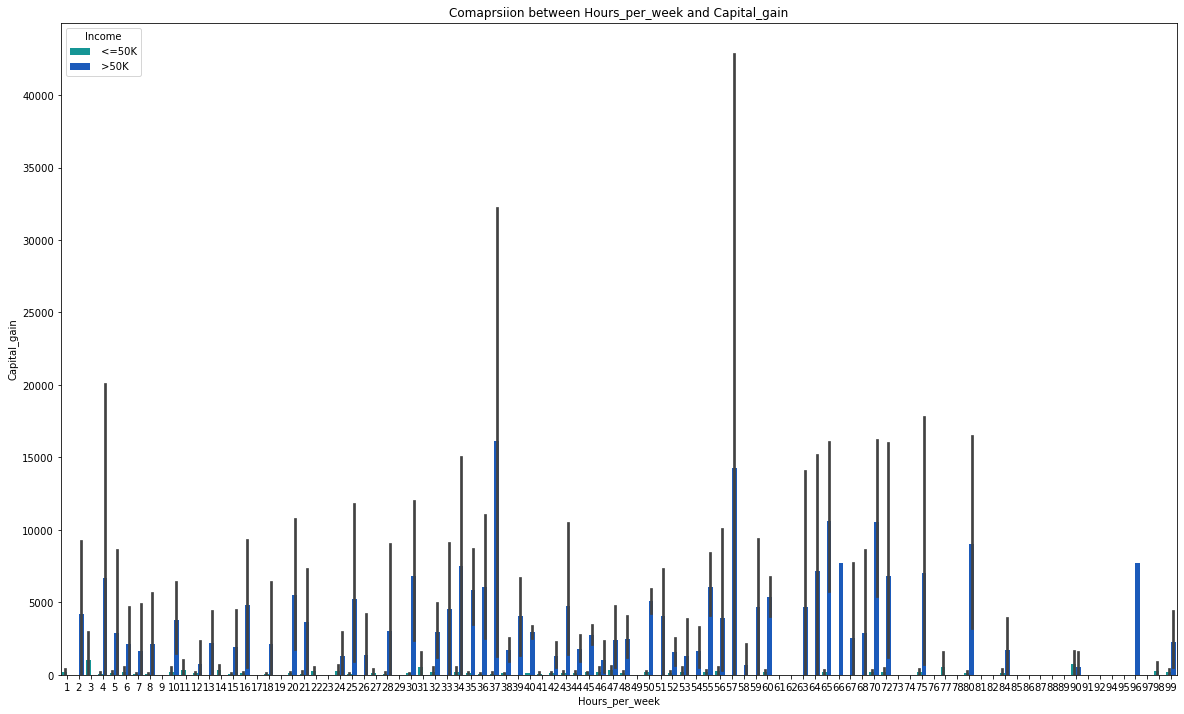

In [35]:
plt.figure(figsize = (20, 12))
plt.title("Comaprsiion between Hours_per_week and Capital_gain")
sns.barplot(x = 'Hours_per_week', y = 'Capital_gain', data = census_df, hue = 'Income', palette ='winter_r')
plt.show()

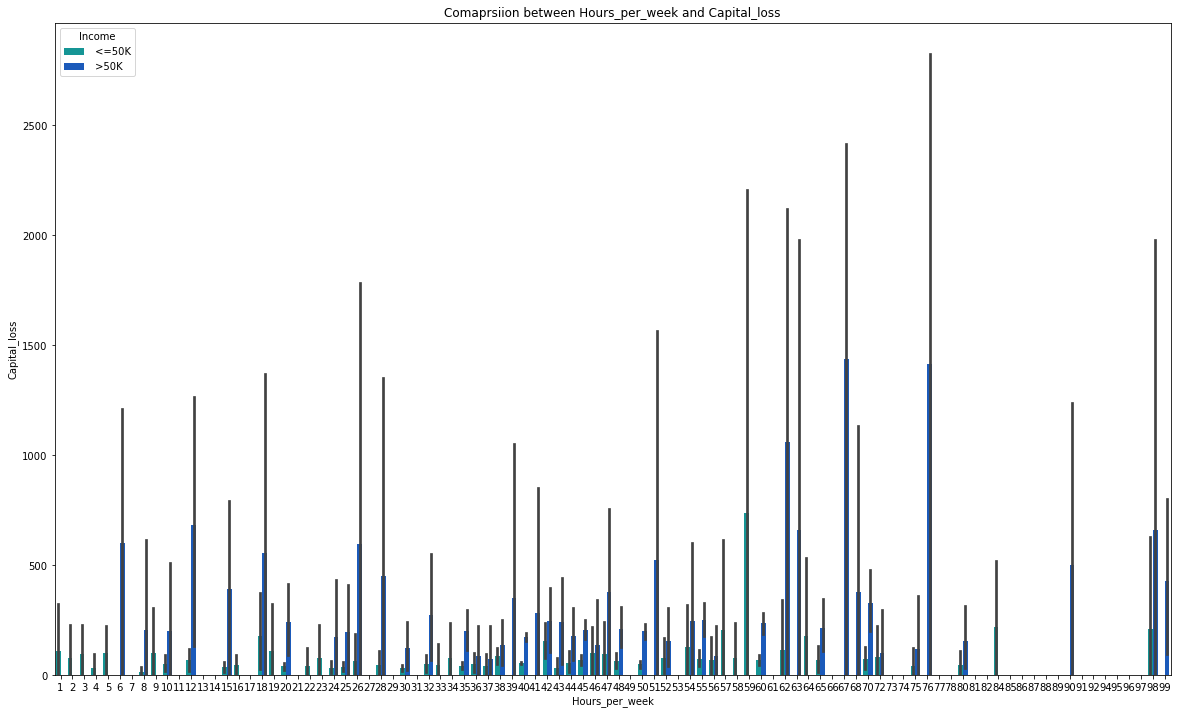

In [36]:
plt.figure(figsize = (20, 12))
plt.title("Comaprsiion between Hours_per_week and Capital_loss")
sns.barplot(x = 'Hours_per_week', y = 'Capital_loss', data = census_df, hue = 'Income', palette ='winter_r')
plt.show()

# Multivariate Analysis

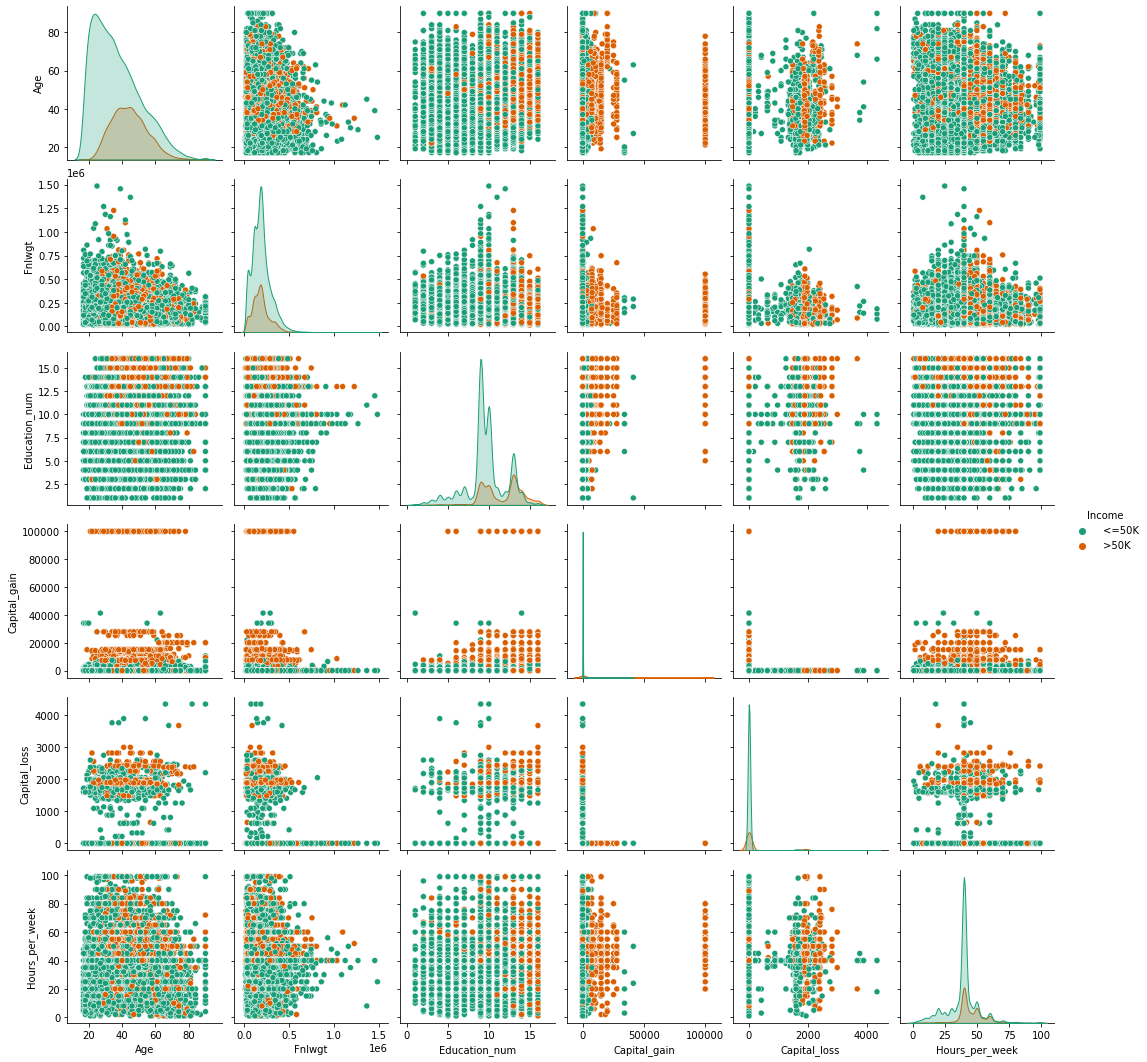

In [37]:
#for more than two coloumns using multivariate
sns.pairplot(census_df, hue="Income", palette="Dark2")
plt.show()

# Checking for Outliers

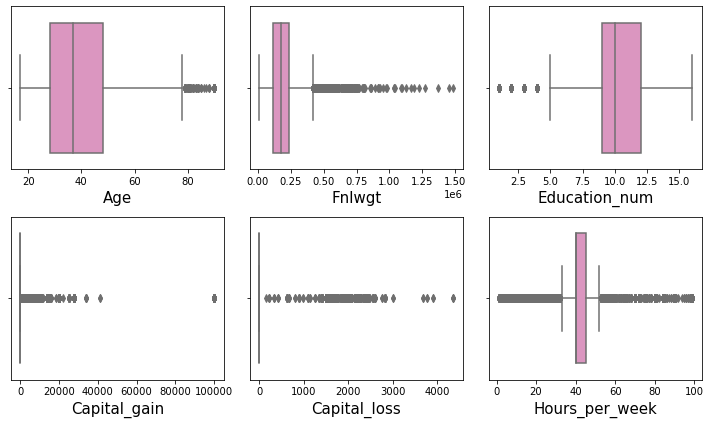

In [38]:
#lets check  the outliers by plotting boxplot.
#to detect the outlers using inter Quartile method
plt.figure(figsize=(10, 6), facecolor="white")
plotnumber=1
for col in numerical_col:
    if plotnumber<=6:
        ax=plt.subplot(2, 3, plotnumber)
        sns.boxplot(census_df[col], palette= "Set2_r")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

We do not remove the outliers from the target variable and from the so we have found outliers in all columns

So, removing the outliers using the ascore and IQR technique before the model and selected best one.

In [39]:
from scipy.stats import zscore
out_features=census_df[['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']]
z=np.abs(zscore(out_features)) 
z

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,0.837097,1.008742,1.134779,0.145914,0.216663,2.222120
1,0.042640,0.245046,0.420027,0.145914,0.216663,0.035430
2,1.057031,0.425770,1.197429,0.145914,0.216663,0.035430
3,0.775755,1.408146,1.134779,0.145914,0.216663,0.035430
4,0.115952,0.898170,1.523480,0.145914,0.216663,0.035430
...,...,...,...,...,...,...
32555,0.849066,0.639710,0.746077,0.145914,0.216663,0.197407
32556,0.103982,0.335466,0.420027,0.145914,0.216663,0.035430
32557,1.423589,0.358811,0.420027,0.145914,0.216663,0.035430
32558,1.215624,0.110927,0.420027,0.145914,0.216663,1.655200


In [40]:
np.where(z>3)

(array([    9,    22,    27, ..., 32524, 32524, 32530], dtype=int64),
 array([5, 4, 5, ..., 0, 5, 5], dtype=int64))

In [41]:
z.iloc[22,5]

0.0354299917155329

In [42]:
#Now removing the data above Zscore and creating new DF
#removing the index value and making the new df
df1 = census_df[(z<3).all(axis=1)]

df1.shape

(29827, 15)

In [43]:
#shape of old and new dataframe
print("Old Data Frame-", census_df.shape[0])
print("New Data Frame-", df1.shape[0])

Old Data Frame- 32560
New Data Frame- 29827


In [44]:
print("Data Loss Percentage- ", ((census_df.shape[0]-df1.shape[0])/census_df.shape[0])*100)

Data Loss Percentage-  8.393734643734643


#data lose should be less than 10%- its more than 10% means we are loosing the data



# Checking How the data has been distributed in each column

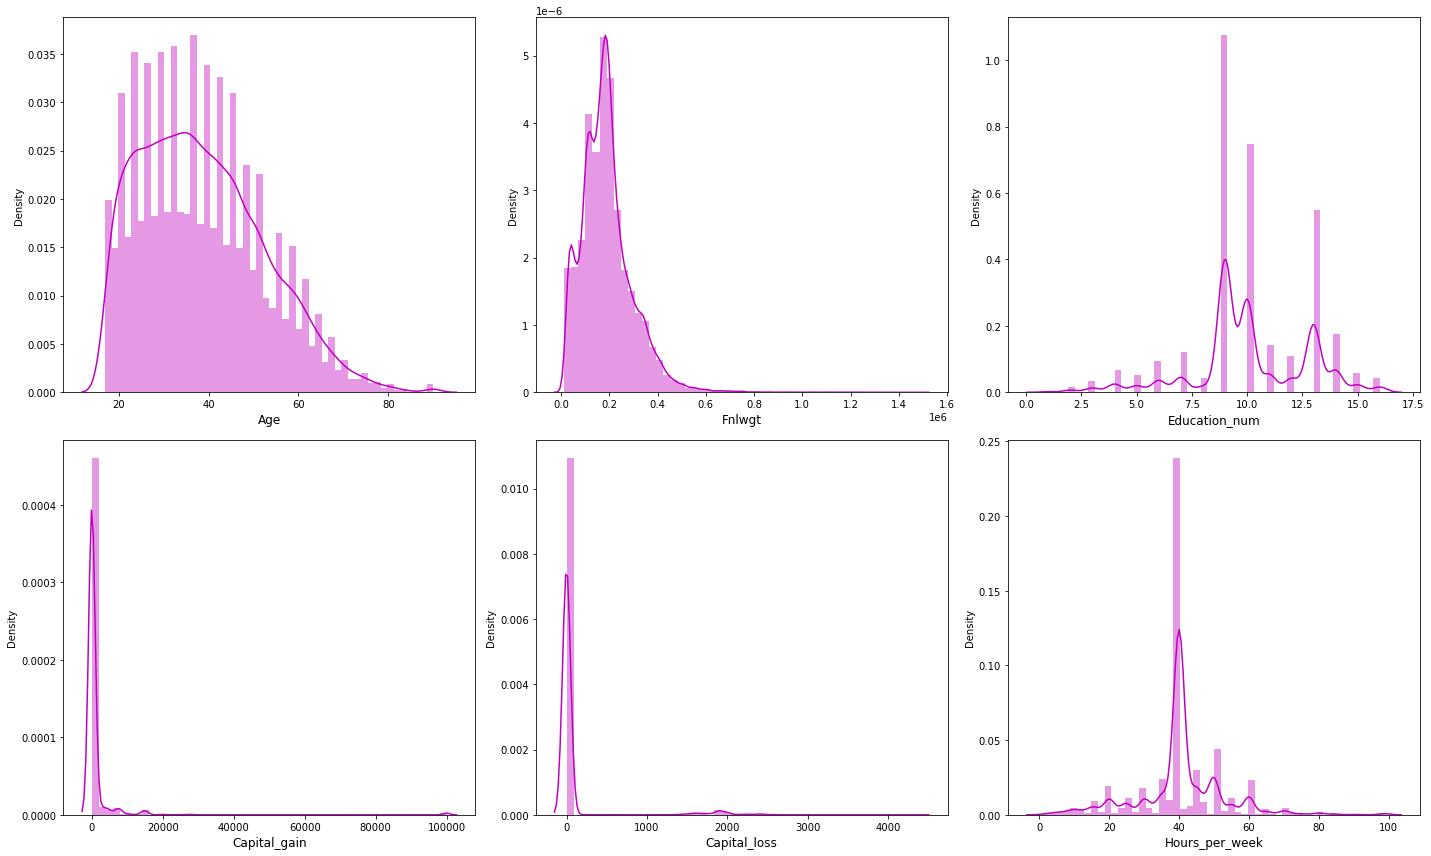

In [45]:
#Distplot
plt.figure(figsize = (20, 12), facecolor = "white")
plotnumber = 1
for col in numerical_col:   # for col using numerical_col
    if plotnumber<=17:       #pltnumber is less than four equal to 4 each grap we are using four plot
        ax = plt.subplot(2,3 , plotnumber) #number of plot in given dimenstion using subplot 
        sns.distplot(census_df[col], color = "m") #plt colour for columns
        plt.xlabel(col, fontsize = 12)
        plt.yticks(rotation = 0, fontsize =10)
    plotnumber+=1
plt.tight_layout()

# checking the skewness

In [46]:
census_df.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

in the above data capital_gain & loss is not in the range

In [47]:
#Removing the skewness using the cuberoot method
census_df['Capital_gain']= np.cbrt(census_df['Capital_gain'])
census_df['Capital_loss']= np.cbrt(census_df['Capital_loss'])
census_df['Fnlwgt']= np.cbrt(census_df['Fnlwgt'])

In [48]:
census_df.skew()

Age               0.558738
Fnlwgt           -0.164177
Education_num    -0.311630
Capital_gain      4.100150
Capital_loss      4.336999
Hours_per_week    0.227636
dtype: float64

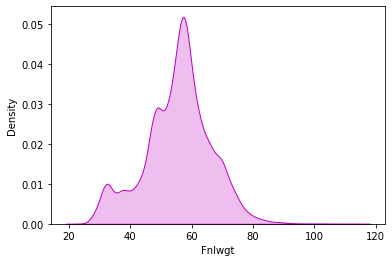

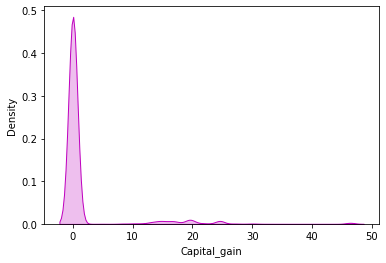

In [49]:
#Lets vissualize how thw data has been ditrsibuted in volume after remoing skewness

sns.distplot(census_df['Fnlwgt'], color = "m", kde_kws = {"shade":True}, hist = False)
plt.show()

sns.distplot(census_df['Capital_gain'], color = "m", kde_kws = {"shade":True}, hist = False)
plt.show()


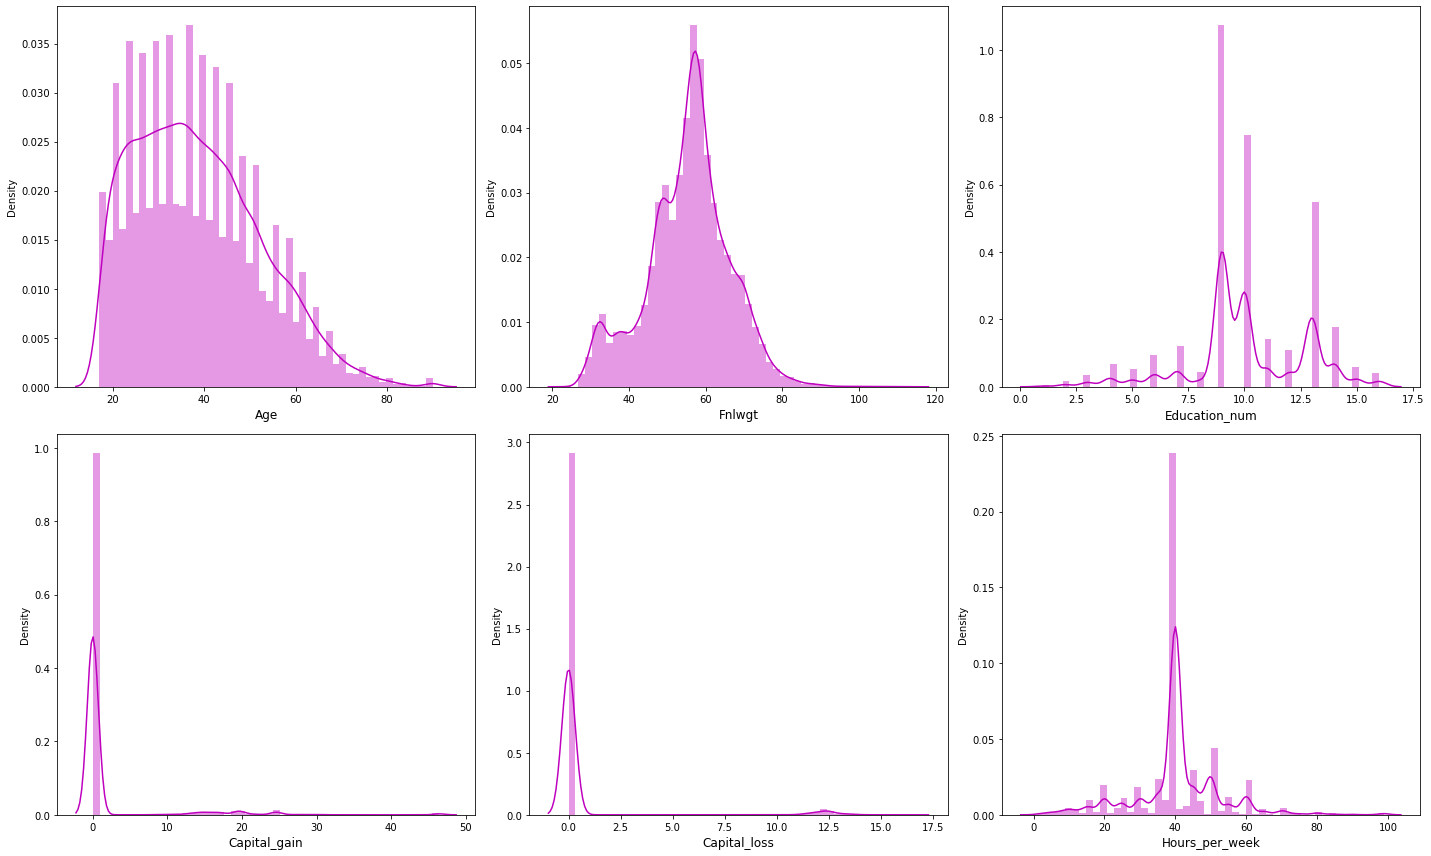

In [50]:
#Distplot
plt.figure(figsize = (20, 12), facecolor = "white")
plotnumber = 1
for col in numerical_col:   # for col using numerical_col
    if plotnumber<=17:       #pltnumber is less than four equal to 4 each grap we are using four plot
        ax = plt.subplot(2,3 , plotnumber) #number of plot in given dimenstion using subplot 
        sns.distplot(census_df[col], color = "m") #plt colour for columns
        plt.xlabel(col, fontsize = 12)
        plt.yticks(rotation = 0, fontsize =10)
    plotnumber+=1
plt.tight_layout()

# Encoding categorical columns

In [51]:
#different Encoding method are their using this method u can use- label, ordinal,hotencoder, pandas dot get them method 
#Encoding categorical columns using Ordinal Encoder
#OE -Ordinal Encoder -OE is variable name
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in census_df.columns:   #using for loop itrating through the columns
    if census_df[i].dtypes=='object':   #and if the datatypes is object
        census_df[i] = OE.fit_transform(census_df[i].values.reshape(-1, 1)) #i am using ordinal encoder to fit transformation after that i am using the reshapping the value
census_df

# we directly using the code for coverting the string vaue into numerical vaue using encoding method

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,43.675121,9.0,13,2.0,4.0,0.0,4.0,1.0,0.000000,0.0,13,39.0,0.0
1,38,4.0,59.967204,11.0,9,0.0,6.0,1.0,4.0,1.0,0.000000,0.0,40,39.0,0.0
2,53,4.0,61.685627,1.0,7,2.0,6.0,0.0,2.0,1.0,0.000000,0.0,40,39.0,0.0
3,28,4.0,69.686283,9.0,13,2.0,10.0,5.0,2.0,0.0,0.000000,0.0,40,5.0,0.0
4,37,4.0,65.776255,12.0,14,2.0,4.0,5.0,4.0,0.0,0.000000,0.0,40,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,63.603506,7.0,12,2.0,13.0,5.0,4.0,0.0,0.000000,0.0,38,39.0,0.0
32556,40,4.0,53.644440,11.0,9,2.0,7.0,0.0,4.0,1.0,0.000000,0.0,40,39.0,1.0
32557,58,4.0,53.357498,11.0,9,6.0,1.0,4.0,4.0,0.0,0.000000,0.0,40,39.0,0.0
32558,22,4.0,58.625222,11.0,9,4.0,1.0,3.0,4.0,1.0,0.000000,0.0,20,39.0,0.0


we have converted the categrical columns into numerical columns using Ordinal Encoding method

In [52]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             32560 non-null  int64  
 1   Workclass       32560 non-null  float64
 2   Fnlwgt          32560 non-null  float64
 3   Education       32560 non-null  float64
 4   Education_num   32560 non-null  int64  
 5   Marital_status  32560 non-null  float64
 6   Occupation      32560 non-null  float64
 7   Relationship    32560 non-null  float64
 8   Race            32560 non-null  float64
 9   Sex             32560 non-null  float64
 10  Capital_gain    32560 non-null  float64
 11  Capital_loss    32560 non-null  float64
 12  Hours_per_week  32560 non-null  int64  
 13  Native_country  32560 non-null  float64
 14  Income          32560 non-null  float64
dtypes: float64(12), int64(3)
memory usage: 3.7 MB


In the above information all the data are float/integer type before there is a objective value

In [53]:
#Statistical summary of numerical
census_df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,55.449140,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1.675277,0.571853,40.437469,36.718796,0.240817
std,13.640642,1.455879,10.828848,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,6.012772,2.592782,12.347618,7.823892,0.427586
min,17.000000,0.000000,23.074115,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,49.025324,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,56.290476,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,61.889371,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,114.081019,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,46.415734,16.331621,99.000000,41.000000,1.000000


After Encoding the categorical columns we can see all column details here. The Counts of all the columns are same taht means no null values in the datset This describemethod describe the count, mean,st,min,IQR, and max values of all the columns

# Correlation Between target varuiable and Independent variable

In [54]:
#cheking the correlation between feature and target
#cor -correlation
cor = census_df.corr()
cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.068166,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.124537,0.052890,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016131,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.030252,0.011129,0.138974,-0.007710,0.051645
Fnlwgt,-0.068166,-0.016131,1.000000,-0.029089,-0.040712,0.027510,0.002661,0.010216,-0.013139,0.022738,-0.000755,-0.006159,-0.022684,-0.058644,-0.004462
Education,-0.010508,0.023537,-0.029089,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030797,0.016781,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.040712,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.148259,0.078084,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.027510,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.068302,-0.035627,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.002661,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025226,0.018721,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.010216,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.086298,-0.058887,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.013139,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.022891,0.018584,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.022738,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.071816,0.043820,0.229312,-0.008125,0.215995


This gives the correlation between the dependent and independent variables. WE can Visualize this by plotting heatmap

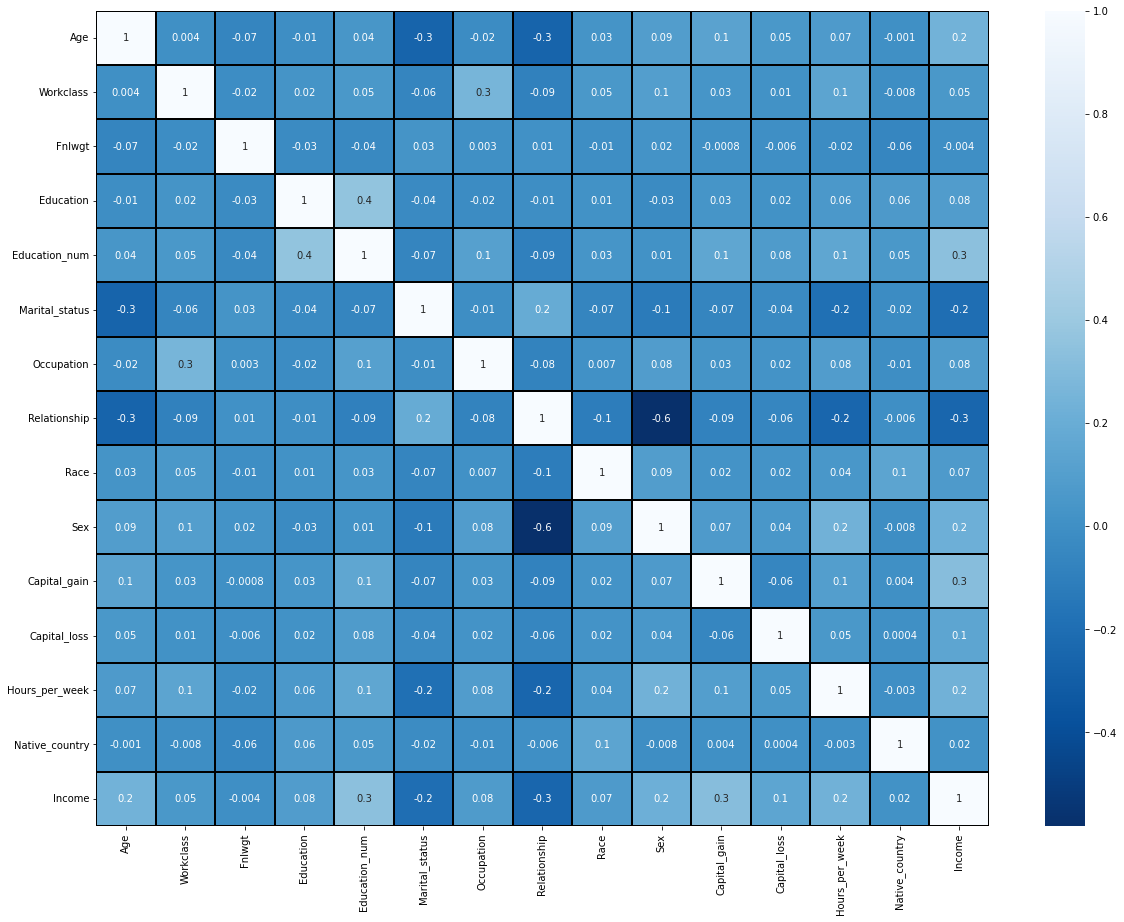

In [55]:
#Visualizing the correlation matrix by plotting heatmap
#for 2nd line again using corr linewidth, fmt-is the how many decimal value should be present
#annot=True is the the grap value will show in the white colours, 
#in casse Annot=False The grap value will shows in the same color it will not show it show s the same colour
plt.figure(figsize = (20, 15))
sns.heatmap(census_df.corr(), linewidth = 0.1, fmt = ".1g", linecolor ="black", annot = True, cmap = "Blues_r")
plt.yticks(rotation= 0);
plt.show()

- no relation, -0.3 to -0.3 -less correlation, greater than -0.5 to greater than +0.5- moderate corelation, greater than -0.7 or greater than +0.7 are high correlation

This heatmap shows the correlation matrix by visulaizing the data . We can observe the relation between feature to feature and feature to label . This heatmap contains both positive and negative correlation

In [56]:
cor['Income'].sort_values(ascending= False)

Income            1.000000
Education_num     0.335182
Capital_gain      0.313933
Age               0.234039
Hours_per_week    0.229690
Sex               0.215995
Capital_loss      0.144075
Education         0.079311
Occupation        0.075448
Race              0.071853
Workclass         0.051645
Native_country    0.015845
Fnlwgt           -0.004462
Marital_status   -0.199295
Relationship     -0.250924
Name: Income, dtype: float64

Visualizing the correlation between label and feature using bar plot

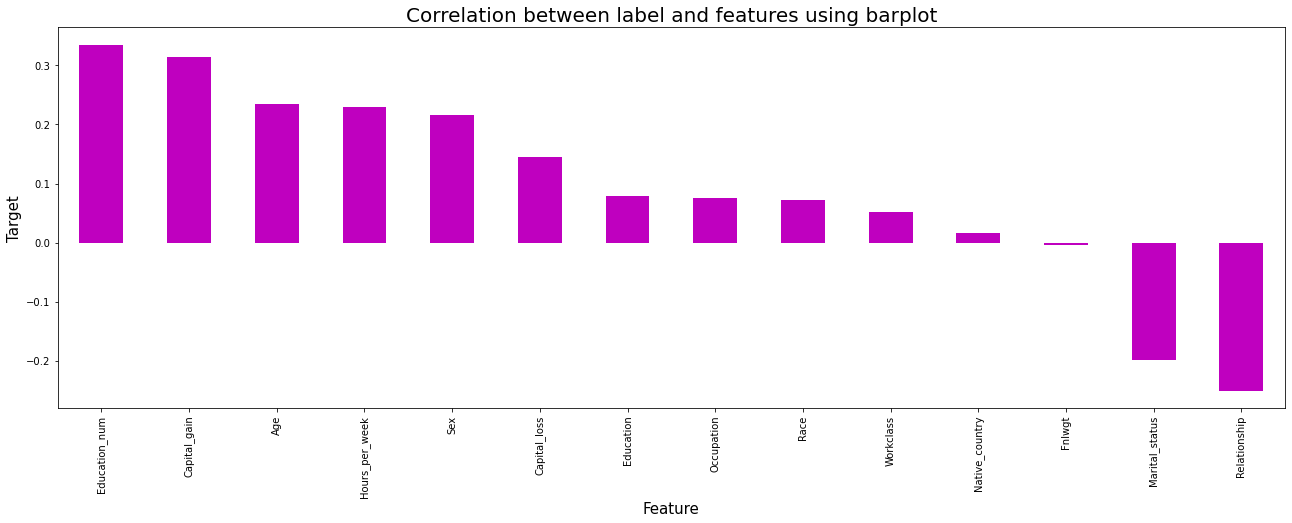

In [57]:
plt.figure(figsize = (22, 7))
census_df.corr()['Income'].sort_values(ascending = False).drop(['Income']).plot(kind='bar',color="m")
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Target', fontsize = 15)
plt.title("Correlation between label and features using barplot", fontsize=20)
plt.show()

In [58]:
x = census_df.drop("Income", axis = 1)
y = census_df["Income"]

In [59]:
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,6.0,43.675121,9.0,13,2.0,4.0,0.0,4.0,1.0,0.000000,0.0,13,39.0
1,38,4.0,59.967204,11.0,9,0.0,6.0,1.0,4.0,1.0,0.000000,0.0,40,39.0
2,53,4.0,61.685627,1.0,7,2.0,6.0,0.0,2.0,1.0,0.000000,0.0,40,39.0
3,28,4.0,69.686283,9.0,13,2.0,10.0,5.0,2.0,0.0,0.000000,0.0,40,5.0
4,37,4.0,65.776255,12.0,14,2.0,4.0,5.0,4.0,0.0,0.000000,0.0,40,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,63.603506,7.0,12,2.0,13.0,5.0,4.0,0.0,0.000000,0.0,38,39.0
32556,40,4.0,53.644440,11.0,9,2.0,7.0,0.0,4.0,1.0,0.000000,0.0,40,39.0
32557,58,4.0,53.357498,11.0,9,6.0,1.0,4.0,4.0,0.0,0.000000,0.0,40,39.0
32558,22,4.0,58.625222,11.0,9,4.0,1.0,3.0,4.0,1.0,0.000000,0.0,20,39.0


In [60]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
32555    0.0
32556    1.0
32557    0.0
32558    0.0
32559    1.0
Name: Income, Length: 32560, dtype: float64

Feature Scaling Standard Scalarization

In [61]:
#FT- from the previous learning the data will change, x columns- is indepenndent columns

#FT- from the previous learning the data will change, x columns- is indepenndent columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.837097,1.463883,-1.087299,-0.335443,1.134779,-0.406183,-0.608434,-0.900177,0.393675,0.703087,-0.278624,-0.220559,-2.222120,0.291573
1,-0.042640,0.090121,0.417231,0.181319,-0.420027,-1.734026,-0.135480,-0.277810,0.393675,0.703087,-0.278624,-0.220559,-0.035430,0.291573
2,1.057031,0.090121,0.575923,-2.402489,-1.197429,-0.406183,-0.135480,-0.900177,-1.962583,0.703087,-0.278624,-0.220559,-0.035430,0.291573
3,-0.775755,0.090121,1.314762,-0.335443,1.134779,-0.406183,0.810427,2.211658,-1.962583,-1.422298,-0.278624,-0.220559,-0.035430,-4.054157
4,-0.115952,0.090121,0.953682,0.439700,1.523480,-0.406183,-0.608434,2.211658,0.393675,-1.422298,-0.278624,-0.220559,-0.035430,0.291573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.849066,0.090121,0.753034,-0.852204,0.746077,-0.406183,1.519858,2.211658,0.393675,-1.422298,-0.278624,-0.220559,-0.197407,0.291573
32556,0.103982,0.090121,-0.166659,0.181319,-0.420027,-0.406183,0.100997,-0.900177,0.393675,0.703087,-0.278624,-0.220559,-0.035430,0.291573
32557,1.423589,0.090121,-0.193158,0.181319,-0.420027,2.249503,-1.317864,1.589291,0.393675,-1.422298,-0.278624,-0.220559,-0.035430,0.291573
32558,-1.215624,0.090121,0.293303,0.181319,-0.420027,0.921660,-1.317864,0.966924,0.393675,0.703087,-0.278624,-0.220559,-1.655200,0.291573


Checking the variance Inflation Factor(VIF)

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i)
                     for i in range(len(x.columns))]
vif["Features"] = x.columns

vif


,VIF values,Features
0,1.166668,Age
1,1.093766,Workclass
2,1.011357,Fnlwgt
3,1.159666,Education
4,1.226190,Education_num
5,1.127707,Marital_status
6,1.091882,Occupation
7,1.682692,Relationship
8,1.038200,Race
9,1.560273,Sex


In [63]:
y.value_counts()

0.0    24719
1.0     7841
Name: Income, dtype: int64

Here we can see that the data is no balanced, Since it is a classsification problem we will balance the data using oversampling method

OverSampling

In [64]:
#OverSampling the data
#Smote is the one of the method to balnce the classes  using randum over smapling
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x,y)

In [65]:
#Checking value count of target column
#the ratio is 1:1 
y.value_counts()

0.0    24719
1.0    24719
Name: Income, dtype: int64

Now the data is balanced. Now we can build Machine learning classification models

# Modelling

Finding the best random State

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuaracy is ", maxAccu, "at random_state", maxRS)
    

Best accuaracy is  0.9045981661272924 at random_state 76


The best accuracy id 90.45% at random_state 76

Crating train test split

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.30, random_state = maxRS)

Classification Algorithms

In [68]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

RandomForestclassifier

In [69]:
#Checking accuracy for RandomForestClasifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.9037216828478964
[[6554  785]
 [ 643 6850]]
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90      7339
         1.0       0.90      0.91      0.91      7493

    accuracy                           0.90     14832
   macro avg       0.90      0.90      0.90     14832
weighted avg       0.90      0.90      0.90     14832



Logistic Regression

In [70]:
#Checking accuracy for LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.7705636461704423
[[5616 1723]
 [1680 5813]]
              precision    recall  f1-score   support

         0.0       0.77      0.77      0.77      7339
         1.0       0.77      0.78      0.77      7493

    accuracy                           0.77     14832
   macro avg       0.77      0.77      0.77     14832
weighted avg       0.77      0.77      0.77     14832



In [71]:
#Checking accuracy for SupportVector Machine classifier
svc = SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.8406148867313916
[[5732 1607]
 [ 757 6736]]
              precision    recall  f1-score   support

         0.0       0.88      0.78      0.83      7339
         1.0       0.81      0.90      0.85      7493

    accuracy                           0.84     14832
   macro avg       0.85      0.84      0.84     14832
weighted avg       0.84      0.84      0.84     14832



Gradient Boosting Classifier

In [72]:
#Checking accuracy for Gradient boosting classifier
GB = GradientBoostingClassifier()
GB.fit(x_train, y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.8746628910463862
[[6215 1124]
 [ 735 6758]]
              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87      7339
         1.0       0.86      0.90      0.88      7493

    accuracy                           0.87     14832
   macro avg       0.88      0.87      0.87     14832
weighted avg       0.88      0.87      0.87     14832



AdaBoost Classifier

In [73]:
#Checking accuracy for Ada boost classifier
ABC = AdaBoostClassifier()
ABC.fit(x_train, y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test, predABC))

0.8602346278317152
[[6134 1205]
 [ 868 6625]]
              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86      7339
         1.0       0.85      0.88      0.86      7493

    accuracy                           0.86     14832
   macro avg       0.86      0.86      0.86     14832
weighted avg       0.86      0.86      0.86     14832



BaggingClassifier

In [75]:
#Checking accuracy for Baggingclassifier
BC = BaggingClassifier()
BC.fit(x_train, y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test, predBC))
print(classification_report(y_test, predBC))

0.8818096008629989
[[6551  788]
 [ 965 6528]]
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      7339
         1.0       0.89      0.87      0.88      7493

    accuracy                           0.88     14832
   macro avg       0.88      0.88      0.88     14832
weighted avg       0.88      0.88      0.88     14832



ExtraTreesClassifier

In [76]:
#Checking accuracy for ExtraGTreeClassifier
ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.9072276159654801
[[6517  822]
 [ 554 6939]]
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.90      7339
         1.0       0.89      0.93      0.91      7493

    accuracy                           0.91     14832
   macro avg       0.91      0.91      0.91     14832
weighted avg       0.91      0.91      0.91     14832



Cross Validation Score

In [77]:
from sklearn.model_selection import cross_val_score

In [78]:
#checking cv score for Rabdomforest clasifier
score = cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is-", accuracy_score(y_test,predRFC) - score.mean())

[0.83211974 0.87520227 0.92455502 0.93304339 0.92990796]
0.8989656745823273
Difference between Accuracy score and cross validation score is- 0.0047560082655691005


In [79]:
#checking cv score for Logistic Regression
score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is-", accuracy_score(y_test,predLR) - score.mean())

[0.76375405 0.76972087 0.76820388 0.76757358 0.77010215]
0.7678709076807406
Difference between Accuracy score and cross validation score is- 0.0026927384897016404


In [80]:
#checking cv score for Gradient Boosting classifier
score = cross_val_score(GB,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is-", accuracy_score(y_test,predGB) - score.mean())

[0.82059061 0.85295307 0.87985437 0.88328108 0.8793365 ]
0.8632031273782088
Difference between Accuracy score and cross validation score is- 0.011459763668177358


In [82]:
#checking cv score for Support vector Machine classifier
score = cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is-", accuracy_score(y_test,predsvc) - score.mean())

[0.82635518 0.82756877 0.84031149 0.84393648 0.84171134]
0.8359766514526774
Difference between Accuracy score and cross validation score is- 0.004638235278714209


In [83]:
#checking cv score for AdaBoost classifier
score = cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is-", accuracy_score(y_test,predABC) - score.mean())

[0.81543285 0.84577265 0.86245955 0.86922221 0.86123192]
0.8508238360463529
Difference between Accuracy score and cross validation score is- 0.009410791785362305


In [84]:
#checking cv score for Bagging classifier
score = cross_val_score(BC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is-", accuracy_score(y_test,predBC) - score.mean())

[0.80127427 0.85022249 0.91312702 0.92454739 0.91605138]
0.8810445104928408
Difference between Accuracy score and cross validation score is- 0.0007650903701580392


In [85]:
#checking cv score for Extar Tree classifier
score = cross_val_score(ET,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is-", accuracy_score(y_test,predET) - score.mean())

[0.86852751 0.88845065 0.92688107 0.93172853 0.92869424]
0.908856400137083
Difference between Accuracy score and cross validation score is- -0.0016287841716029483


ExtraTreesclassifier is our best model

Hyper parameter Tunning

In [86]:
#HYper PT - is giving you the more genaralized performance model 1st thing
#2nd thing-HPT- is used-improve the accuaracy and performance of the model
#ExtraTree classifier
from sklearn.model_selection import GridSearchCV

parameters = {'criterion' : ['gini', 'entropy'],
             'random_state': [10, 50, 1000],
             'max_depth': [0, 10, 20],
             'n_jobs': [-2, -1, 1],
             'n_estimators': [50, 100, 200, 300]}

In [87]:
GCV=GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)

In [88]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [89]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 1000}

In [90]:
Final_model = ExtraTreesClassifier(criterion = 'gini', max_depth = 20, n_estimators = 100, n_jobs = -2, random_state = 1000)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

87.25053937432578


Plotting ROC and compare AUC for all the model used

In [91]:
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

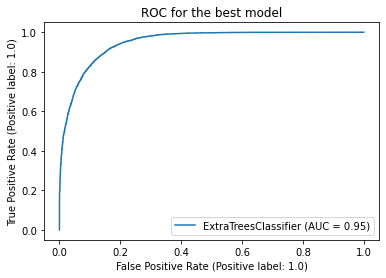

In [92]:
#lets check the AUC for the best model after hyper parameter tunning
plot_roc_curve(Final_model, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

Saving the model

In [93]:
#Saving the model
import joblib
joblib.dump(Final_model, "census_income.pkl")

['census_income.pkl']

Predicting the Saved model

In [94]:
#Lets load the saved model and get the predictions
model = joblib.load("census_income.pkl")

#prediction
prediction = model.predict(x_test)
prediction

array([0., 1., 1., ..., 1., 0., 0.])

In [95]:
a=np.array(y_test)
df = pd.DataFrame()
df["predicted"] = prediction
df["Original"] = a
df

AttributeError: module 'numpy' has no attribute 'arry'

In [96]:
import numpy as np
import pandas as pd

a = np.array(y_test)
df = pd.DataFrame()
df["predicted"] = prediction
df["Original"] = a


In [97]:
df["predicted"]

0        0.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
14827    1.0
14828    0.0
14829    1.0
14830    0.0
14831    0.0
Name: predicted, Length: 14832, dtype: float64

In [98]:
df["Original"]

0        0.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
14827    1.0
14828    0.0
14829    1.0
14830    0.0
14831    0.0
Name: Original, Length: 14832, dtype: float64

In [99]:
prediction

array([0., 1., 1., ..., 1., 0., 0.])

In [100]:
a

array([0., 1., 1., ..., 1., 0., 0.])